In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
from scipy import signal

In [2]:
# data = pd.read_csv('data/Accelerometer.csv')
# data = data.rename(columns={'ax': 'x',  'ay': 'y',  'az': 'z'})

In [3]:
data = pd.read_csv('data/Accelerometer2.csv')

In [4]:
data

,time,seconds_elapsed,z,y,x
0,1637018027814301700,0.080302,-2.465748,-0.262557,-1.983601
1,1637018027834386700,0.100387,-2.392832,0.129411,-1.419485
2,1637018027854471700,0.120472,-1.450402,0.190846,-0.803727
3,1637018027874556400,0.140556,0.329337,0.185925,-0.532893
4,1637018027894642700,0.160643,0.950387,0.189489,-0.756551
...,...,...,...,...,...
3103,1637018090137674200,62.403674,-3.036149,-0.557464,2.853352
3104,1637018090157759500,62.423760,-3.453326,0.147807,4.612354
3105,1637018090177843500,62.443844,-4.400531,0.244185,4.765765
3106,1637018090197928400,62.463928,-4.427135,0.450538,3.466323


In [5]:
# data = data[data.index % 5 == 0]
data = data[data['seconds_elapsed'] > 1]
data = data[data['seconds_elapsed'] < 60]

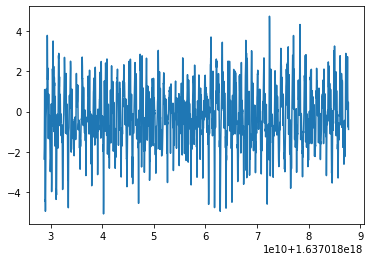

In [6]:
plt.plot(data['time'], data['z'].values)

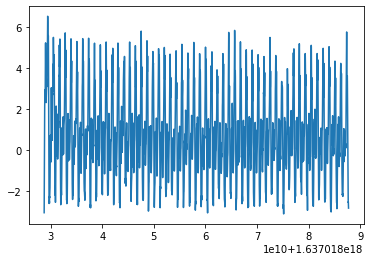

In [7]:
plt.plot(data['time'], data['y'].values)

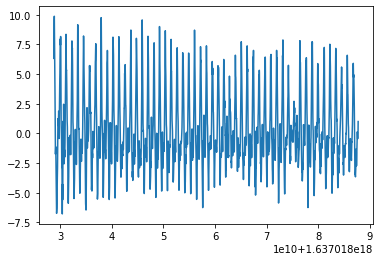

In [8]:
plt.plot(data['time'], data['x'].values)

In [9]:
x = data['x'].values
y = data['y'].values
z = data['z'].values
time = data['seconds_elapsed'].values

In [10]:
b, a = signal.butter(3, 0.1, btype='lowpass', analog=False)

filtered_x = signal.filtfilt(b, a, x)
filtered_y = signal.filtfilt(b, a, y)
filtered_z = signal.filtfilt(b, a, z)

print(filtered_x.shape, filtered_y.shape, filtered_z.shape, time.shape)

(2938,) (2938,) (2938,) (2938,)


(0.0, 10.0)

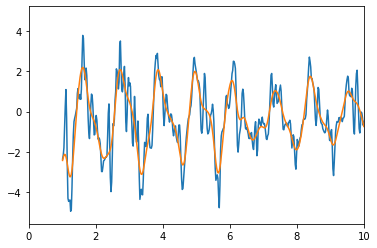

In [11]:
plt.plot(time, z)
plt.plot(time, filtered_z)
plt.xlim(0,10)

In [12]:
data['filtered_x'] = filtered_x
data['filtered_y'] = filtered_y
data['filtered_z'] = filtered_z

In [13]:
# data['acceleration'] = (data['az'] ** 2) + (data['ay']  ** 2) + ( data['az']  ** 2)
# data['acceleration'] = np.sqrt(data['acceleration'])

In [14]:
data

,time,seconds_elapsed,z,y,x,filtered_x,filtered_y,filtered_z
46,1637018028738215700,1.004216,-2.352240,-3.068721,6.325409,6.411778,-3.062504,-2.422787
47,1637018028758300700,1.024301,-2.160007,-1.948084,7.336652,6.855294,-2.077761,-2.280457
48,1637018028778386000,1.044386,-1.799731,-0.607593,8.056497,7.249564,-1.113885,-2.171237
49,1637018028798470700,1.064471,-0.757915,1.035214,9.206396,7.546781,-0.195573,-2.118336
50,1637018028818556000,1.084556,0.260560,1.315497,9.533219,7.707153,0.655810,-2.136399
...,...,...,...,...,...,...,...,...
2979,1637018087647173400,59.913173,-0.301210,-2.437354,-0.425691,0.221149,-1.667224,0.045603
2980,1637018087667257600,59.933258,0.381707,-2.560713,-0.007381,0.413250,-2.122388,-0.198261
2981,1637018087687342300,59.953342,0.464414,-2.538722,0.101093,0.620759,-2.524068,-0.444522
2982,1637018087707427600,59.973427,-0.262690,-2.762480,0.208189,0.839107,-2.875975,-0.687658


(0.0, 10.0)

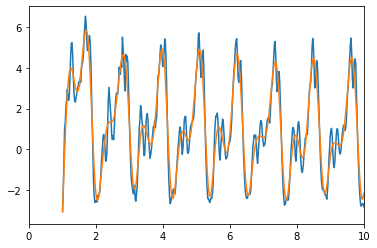

In [15]:
plt.plot(time, y)
plt.plot(time, filtered_y)
plt.xlim(0,10)

(0.0, 20.0)

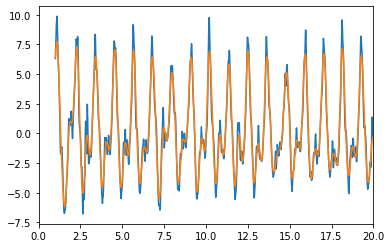

In [16]:
plt.plot(time, x)
plt.plot(time, filtered_x)
plt.xlim(0,20)

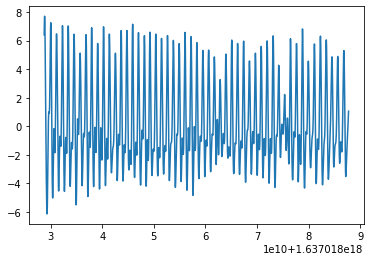

In [17]:
plt.plot(data['time'], data['filtered_x'].values)

In [18]:
# plt.plot(data['time'], data['atotal'])
# plt.plot(data['time'], data['acceleration'])

In [19]:
sample_rate = data.shape[0]
g = data['filtered_z']

### # Adapted from https://stackoverflow.com/questions/66675657/fast-fourier-transform-for-an-accelerometer-in-python


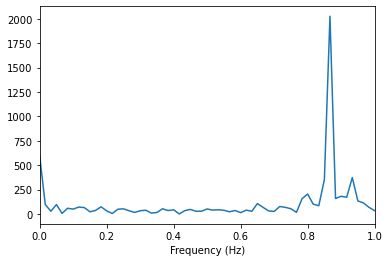

In [20]:
# Adapted from https://stackoverflow.com/questions/66675657/fast-fourier-transform-for-an-accelerometer-in-python
# This returns the fourier transform coeficients as complex numbers
transformed_g = np.fft.fft(g)

# Take the absolute value of the complex numbers for magnitude spectrum
freqs_magnitude = np.abs(transformed_g)

# Create frequency x-axis that will span up to sample_rate
freq_axis = np.linspace(0, sample_rate / 60, len(freqs_magnitude))

# Plot frequency domain
plt.plot(freq_axis, freqs_magnitude)
plt.xlabel("Frequency (Hz)")
plt.xlim(0, 1)
plt.show()